In [1]:
# Import your favourite library
import pennylane as qml

# Import Numpy from PennyLane
from pennylane import numpy as np

# Import the library that you need in order to use your IBM account
# import qiskit_ibm_provider

# IBM_token = #'Your Token Goes Here'

# try:
#     qiskit_ibm_provider.IBMProvider()
# except:
#     qiskit_ibm_provider.IBMProvider.save_account(token=IBM_token, overwrite=True)

sample [[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [0 1]
 [0 1]]


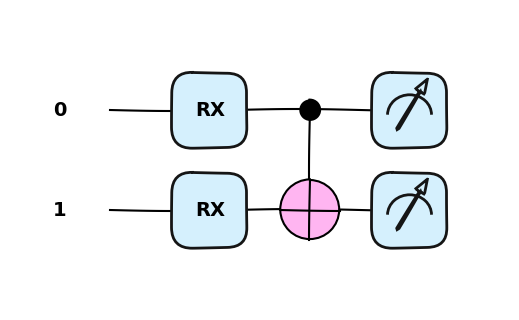

In [24]:
# Choose the device you want to use.
# dev = qml.device("lightning.qubit", wires=2, shots=1000)
dev = qml.device('qiskit.aer', wires=2, shots=1000)
# dev = qml.device('qiskit.ibmq', wires=2, shots=1000, backend='ibmq_qasm_simulator')
# dev = qml.device('qiskit.ibmq', wires=2, shots=1000, backend='ibm_lagos')


# Create a QNode with 2 entangled qubits
@qml.qnode(dev)
def circuit(theta):
    qml.RX(theta[0],wires=0)
    qml.RX(theta[1],wires=1)
    qml.CNOT(wires=[0,1])
    # return qml.expval(qml.PauliZ(wires=range(0,1)))
    return qml.sample()

thetas = np.array([[1.0,2.0],[1.0,2.0]],requires_grad=True)
# Draw your circuit
qml.draw_mpl(circuit,style='pennylane')(thetas)

# Run your circuit
print('sample', np.concatenate(circuit(thetas), axis=0))
# print('sample', circuit(thetas))

In [18]:
def cost(circuit, thetas):
    c = circuit(thetas)
    return np.mean(c)

In [19]:
cost(circuit, thetas)

0.031

In [14]:
opt = qml.GradientDescentOptimizer(0.01)

In [15]:
cost_history = []
for it in range(10):
# for it in range(steps):
    thetas, prev_cost = opt.step_and_cost(lambda thetas: cost(circuit, thetas), thetas)
    
    # clear_output(wait=True)

    print("Step {:3d}       Cost_L = {:9.7f}".format(it, prev_cost), flush=True)
    cost_history.append(prev_cost)

Step   0       Cost_L = 0.0230000
Step   1       Cost_L = 0.0610000
Step   2       Cost_L = 0.0720000
Step   3       Cost_L = 0.0440000
Step   4       Cost_L = 0.0130000
Step   5       Cost_L = 0.0200000
Step   6       Cost_L = 0.0200000
Step   7       Cost_L = 0.0480000
Step   8       Cost_L = 0.0340000
Step   9       Cost_L = 0.0420000


In [1]:
from problems.vqls import A_to_code